<font size="7" face="monospace">Transaction Information</font>

<br>
<font size="5" face="monospace">
    資料來源：http://www.twse.com.tw/zh/page/trading/exchange/STOCK_DAY.html
</font>

<br>
<font size="5" face="monospace">
    不同公司比較其成交資訊
</font>

In [1]:
%matplotlib inline
import requests
import pandas as pd
import multiprocessing as mp
from functools import partial
import matplotlib.pyplot as plt  

In [2]:
# import sys
# python_path = ['', '/Users/AndrewHowCool/anaconda/lib/python36.zip', '/Users/AndrewHowCool/anaconda/lib/python3.6', '/Users/AndrewHowCool/anaconda/lib/python3.6/lib-dynload', '/Users/AndrewHowCool/anaconda/lib/python3.6/site-packages', '/Users/AndrewHowCool/anaconda/lib/python3.6/site-packages/Sphinx-1.6.2-py3.6.egg', '/Users/AndrewHowCool/anaconda/lib/python3.6/site-packages/aeosa', '/Users/AndrewHowCool/anaconda/lib/python3.6/site-packages/setuptools-27.2.0-py3.6.egg'] #list copy and pasted from terminal

# for p in sys.path:
#     if p not in python_path:
#         print (p)


# # import temp as tt
# tt

In [3]:
def url(y, m, s):
    
    y = str(y)
    m = str(m)
    s = str(s)
    
    m = m.zfill(2) #兩位數，若有空則填滿零
    url = 'http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=csv&date=' + y + m + '01&stockNo=' + s
    table = pd.read_csv(url, encoding='big5', error_bad_lines=False)
    
    return table

In [4]:
def clean(table):
    
    #刪除不需要的欄位
    table_name = table.columns.values[0] #儲存標頭
    table = table.reset_index() #重設index和column names
    table.columns = ['日期', '成交股數', '成交金額', '開盤價', '最高價' , '最低價', '收盤價', '漲跌價差', '成交筆數', 'temp']
    table.drop(['temp'], axis = 1, inplace = True) #刪除最後一行的NaN
    table.drop([0, 24, 25, 26, 27], axis = 0, inplace = True) #刪除說明
    table = table.reset_index(drop = True) #重設index
    
    
    #將string轉換為float
    key = ['成交股數', '成交金額', '開盤價', '最高價' , '最低價', '收盤價', '漲跌價差', '成交筆數']
    for i in range(len(key)):
        table[key[i]] = table[key[i]].apply(lambda x: float(x.split()[0].replace(',', ''))) #刪除逗號
        table[key[i]] = table[key[i]].astype(float) #將string轉成float
    
    #將string轉為西元，再轉為datetime
    for i in range(len(table['日期'])):
        day = table.loc[i, '日期']
        day = day.replace('/', '-')
        temp = str(int(day[0:3]) + 1911) #民國轉西元
        day = day.replace(day[0:3], temp)
        table.loc[i, '日期'] = day
    table['日期'] = table['日期'].astype('datetime64[ns]')
    
    return (table_name, table)

In [5]:
def title(name):
    
    name = name.replace(' ', '')
    
    #民國轉西元
    temp = str(int(name[0:3]) + 1911) 
    name = name.replace(name[0:3], temp)
    
    #精簡標頭
    name = name.replace(name[8:12], '')
    name = name.replace(name[11:], '')   
    
    return name

In [6]:
year = 2017
month = 8
stock = 2330

table = url(year, month, stock)
table = clean(table)

#標頭
table_name = table[0]
table_name = title(table_name)

#表格
table_data = table[1]

table = [table_name, table_data]

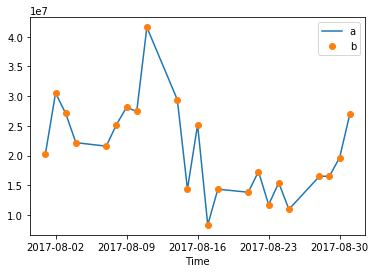

In [7]:
p = table[1]
x = p['日期']
y = p['成交股數']
plt.xlabel("Time") 

plt.plot(x, y, label = 'a')
plt.plot(x, y, 'o', label = 'b')

plt.legend()

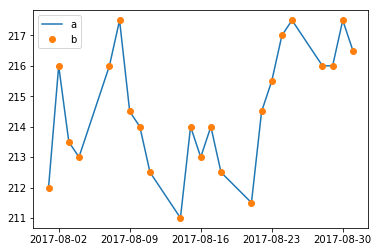

In [8]:
y = p['收盤價']
plt.plot(x, y, label = 'a')
plt.plot(x, y, 'o', label = 'b')

plt.legend()

In [9]:
p

日期        成交股數          成交金額    開盤價    最高價    最低價    收盤價  漲跌價差  \
0  2017-08-01  20314999.0  4.325934e+09  212.5  214.0  212.0  212.0  -2.5   
1  2017-08-02  30528035.0  6.574998e+09  214.0  216.0  214.0  216.0   4.0   
2  2017-08-03  27097397.0  5.779905e+09  213.0  214.0  212.5  213.5  -2.5   
3  2017-08-04  22187420.0  4.735260e+09  213.5  214.0  212.5  213.0  -0.5   
4  2017-08-07  21594977.0  4.653777e+09  213.5  216.5  213.5  216.0   3.0   
5  2017-08-08  25223804.0  5.483118e+09  217.5  219.0  216.0  217.5   1.5   
6  2017-08-09  28129447.0  6.035247e+09  215.0  215.5  213.5  214.5  -3.0   
7  2017-08-10  27440049.0  5.866559e+09  215.5  215.5  212.5  214.0  -0.5   
8  2017-08-11  41592129.0  8.803565e+09  211.0  213.5  210.5  212.5  -1.5   
9  2017-08-14  29414616.0  6.233486e+09  213.5  214.0  210.0  211.0  -1.5   
10 2017-08-15  14385915.0  3.073117e+09  213.0  214.5  213.0  214.0   3.0   
11 2017-08-16  25206990.0  5.357190e+09  214.5  214.5  211.0  213.0  -1.0   
12 2017-08-17   8353232.0  1.785167e+09  213.5  214.0  213.0  214.0   1.0   
13 2017-08-18  14363526.0  3.043468e+09  212.0  213.0  211.0  212.5  -1.5   
14 2017-08-21  13847499.0  2.934065e+09  212.5  213.0  211.5  211.5  -1.0   
15 2017-08-22  17330415.0  3.710810e+09  213.5  214.5  213.0  214.5   3.0   
16 2017-08-23  11757917.0  2.531926e+09  215.5  216.0  214.0  215.5   1.0   
17 2017-08-24  15426842.0  3.341511e+09  216.0  217.0  215.5  217.0   1.5   
18 2017-08-25  10975387.0  2.384766e+09  217.5  217.5  216.0  217.5   0.5   
19 2017-08-28  16512159.0  3.564102e+09  215.0  216.5  215.0  216.0  -1.5   
20 2017-08-29  16561161.0  3.569386e+09  216.0  216.0  215.0  216.0   0.0   
21 2017-08-30  19674310.0  4.274684e+09  216.0  218.0  216.0  217.5   1.5   
22 2017-08-31  26945202.0  5.837057e+09  217.5  218.0  215.5  216.5  -1.0   

       成交筆數  
0    7318.0  
1   11028.0  
2    7041.0  
3    5240.0  
4    7115.0  
5    8404.0  
6    9826.0  
7    8227.0  
8   13751.0  
9    7719.0  
10   5250.0  
11   8610.0  
12   3120.0  
13   3999.0  
14   5152.0  
15   7908.0  
16   5873.0  
17   6953.0  
18   5546.0  
19   5673.0  
20   5587.0  
21   6732.0  
22   6585.0